# **Universidad del Norte**
## **Departamento de Ingeniería de Sistemas**
## IST4360 - Parcial 1



*   Nombres y Apellidos: Kenny Dong Jie Zhu Ye, Samir David Mercado Blanco
*   Códigos: 200164380 , 200161553




Considere la *curva de Agnesi* dada por la función:
$$f(x) = \frac{1}{1+x^2}$$
con $-1\leq x \leq 1$.

Escriba un polinomio $p(x)$ tal que $|f(x)-p(x)|\leq 10^{-10}$. Pruebe además que su polinomio $p$ cumple la condición $|f(x)-p(x)|\leq 10^{-10}$ para $x\in [-1,\, 1]$, grafique los errores. (150 Ptos)

In [24]:
import warnings
import numpy as np
import numpy.linalg as la
import math as mt
import matplotlib.pyplot as plt
import sympy.plotting as pls
import seaborn as sns
import sympy as sp
from IPython.display import display, Math
from sympy.parsing.sympy_parser import parse_expr

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [25]:
x = sp.symbols("x")  # creamos la variable x
f = (1/(1+x**2))  # asignamos la funcion

x0 = 0   # punto de expansion
n = 6    # orden de polinomio

p = sp.series(expr = f, x=x , x0=x0, n=n)   # genera la serie de taylor
display(Math(sp.latex(p)))   # muestra la serie en formato latex

<IPython.core.display.Math object>

In [26]:
# Se genera una lista de polinomios de Taylor de f(x)
p = [sp.series(expr = f, x=x , x0=x0, n=ni).removeO() for ni in range(2,50)]

# Se genera un arreglo con los grados de los polinomios de Taylor generados
pol_deg = np.arange(1,(len(p)+1))

# Se evalúa la función f(x) en x=0.5
f_eval = f.subs(x, 0.5).evalf()

# Se evalúa cada uno de los polinomios de Taylor en x=0.5
p_eval = [p_n.subs(x, 0.5).evalf() for p_n in p]

# Se genera una lista con los errores reales para cada grado de polinomio generado
error_real = [np.abs(float(f_eval - p_eval[i])) for i in range(len(pol_deg))]

In [27]:
found_n = False
for i in range(len(error_real)):
    if error_real[i] <= 10**-10:
        print(f"El polinomio p(x) tal que |f(x) − p(x)| ≤ 10^-10 para −0.2 ≤ x ≤ 0.2 es: \nPolinomio de orden n = {i+1}")
        found_n = True
        print(f"Valor es: {error_real[i]}")
        break
if not found_n:
    print("No hay polinomio p(x) tal que |f(x) − p(x)| ≤ 10^-10 para −0.2 ≤ x ≤ 0.2. Intente con más polinomios.")

El polinomio p(x) tal que |f(x) − p(x)| ≤ 10^-10 para −0.2 ≤ x ≤ 0.2 es: 
Polinomio de orden n = 32
Valor es: 4.656608432185294e-11


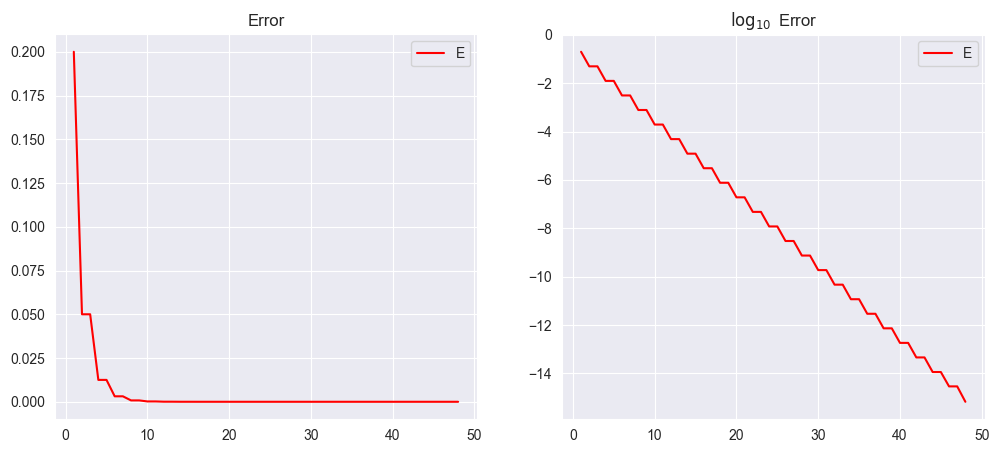

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(pol_deg,error_real, color ='r')
ax1.set_title('Error')
ax1.legend('Error real', prop={'size':10})

ax2.plot(pol_deg,np.log10(error_real), color = 'r')
ax2.set_title('$\log_{10}$ Error')
ax2.legend('Error real', prop={'size':10});

Grafique en un solo lienzo a $f$ y los polinomios de Taylor de grado $n=1,2,...,6$. (50 Ptos)

In [29]:
p = sp.series(expr= f, x=x, x0=x0, n=n)  # genera la serie de taylor de f
display(Math(sp.latex(p)))

<IPython.core.display.Math object>

In [30]:
max_n = 8
p = [sp.series(expr = f, x0=x0, n=n).removeO() for n in range(2,max_n)]  
p_latex = [sp.latex(pol) for pol in p]
distLatex = [display(Math(q)) for q in p_latex]
n_pol = len(p)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

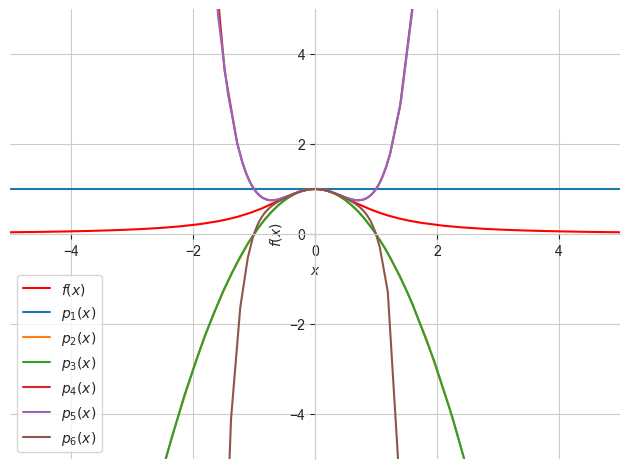

In [31]:
sns.set_style('whitegrid')
cmap = sns.color_palette('tab10', n_pol)
fig = pls.plot(f,xlim=[-5,5],ylim=[-5,5], line_color='r', show=False)
labs = ['$f(x)$']
for n in range(n_pol):
  c = cmap[n]
  labs.append(f'$p_{n+1}(x)$')
  fig.extend(pls.plot(p[n],xlim=[-5,5],ylim=[-5,5], line_color=c, show=False))
for n in range(n_pol+1): fig[n].label = labs[n]
fig.legend = True
fig.show()

Calcule $f'(1)$ mediante diferencias progresivas con $\mathcal{O}{(h^2)}$ para distintos valores de $h$, grafique los errores e indique qué valor de $h$ minimiza el error. (100 Ptos)

Haciendo uso del Teorema de Taylor tenemos las siguientes igualdades para $x=x_0+kh$, con $k=1,2$ 
$$f(x_{0}+h)=f{\left(x_{0} \right)} + h f'(x_{0}) + \frac{h^{2}}{2}f''(x_{0}) + O(h^3) 
\\f(x_{0}+2h)=f{\left(x_{0} \right)} + 2 h f'(x_{0}) + 2 h^{2} f''(x_{0}) + O(h^3)$$

Con lo anterior nos interesa encontrar una combinación lineal tal el termino $f''$ desaparezca y que además se garantice que $f'$ se mantenga. Es decir que nos interesan encontrar constantes $a,b$ tales que se obtenga la siguiente combinación lineal
$$(a + 2b) f'(x_{0}) +   (\frac{a}{2} + 2 b) f''(x_{0}) = f'(x_0)$$


In [32]:
coeff = np.array([
    [1, 2],
    [1/2,2], 
])

# Se define el vector de términos constantes "constants"
constants = np.array([1,0])

# Se resuelve el sistema de ecuaciones lineales representado por la matriz de coeficientes "coeff" y el vector de términos constantes "constants" utilizando la función "solve" del módulo "linalg" de NumPy.
# Los valores de la matriz de soluciones se asignan a las variables "a", "b", respectivamente.
a, b = la.solve(coeff,constants)

In [33]:
x,x0,h = sp.symbols('x,x0,h')
f = parse_expr('f(x)')
n=3

In [34]:
f1 =f.subs(x,x0+h)-sp.series(expr=f,x=x,x0=x0,n=n).subs(x,x0+h)
display(f1)
f2 =f.subs(x,x0+2*h)-sp.series(expr=f,x=x,x0=x0,n=n).subs(x,x0+2*h)
display(f2)

f(h + x0) - f(x0) - h*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x0) - h**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, x0)/2 + O(h**3)

f(2*h + x0) - f(x0) - 2*h*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x0) - 2*h**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, x0) + O(h**3)

In [35]:
# Define una expresión simbólica F0 como una combinación lineal de las expresiones simbólicas f1, f2 y f3, utilizando los símbolos a, b y c.
F0 = a*f1 + b*f2

# Simplifica la expresión simbólica F0 utilizando la función nsimplify() del módulo sympy.
# Se le proporciona una tolerancia de 10^-4 para simplificar la expresion y se indica que se prefiere una forma racional.
F1 = sp.nsimplify(F0, tolerance=10**-4, rational=True)

# Asigna la expresión simplificada a la variable F1.

In [36]:
display(Math(sp.latex(F1).replace('\\left. \\frac{d}{d \\xi_{1}} f{\\left(\\xi_{1} \\right)} \\right|_{\\substack{ \\xi_{1}=x_{0} }}',"f'(x_{0})")+'=0'))

<IPython.core.display.Math object>

obtenemos:

formula diferencias progresivas
$$f'(x_{0}) = \frac{-f(x_{0}+2h)+4f(x_{0}+h)-3f(x_{0})}{2h} + O\left(h^{2}\right)$$


In [37]:
f1 =f.subs(x,x0-h)-sp.series(expr=f,x=x,x0=x0,n=n).subs(x,x0-h)
display(f1)
f2 =f.subs(x,x0-2*h)-sp.series(expr=f,x=x,x0=x0,n=n).subs(x,x0-2*h)
display(f2)

f(-h + x0) - f(x0) + h*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x0) - h**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, x0)/2 + O(h**3)

f(-2*h + x0) - f(x0) + 2*h*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x0) - 2*h**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, x0) + O(h**3)

In [38]:
# Define una expresión simbólica F0 como una combinación lineal de las expresiones simbólicas f1 y f2, utilizando los símbolos a y b
F0 = a*f1 + b*f2

# Simplifica la expresión simbólica F0 utilizando la función nsimplify() del módulo sympy.
# Se le proporciona una tolerancia de 10^-4 para simplificar la expresion y se indica que se prefiere una forma racional.
F1 = sp.nsimplify(F0, tolerance=10**-4, rational=True)

# Asigna la expresión simplificada a la variable F1.

In [39]:
display(Math(sp.latex(F1).replace('\\left. \\frac{d}{d \\xi_{1}} f{\\left(\\xi_{1} \\right)} \\right|_{\\substack{ \\xi_{1}=x_{0} }}',"f'(x_{0})")+'=0'))

<IPython.core.display.Math object>

obtenemos:

formula diferencia regresiva
$$f'(x_{0}) = \frac{f(x_{0}-2h)-4f(x_{0}-h)+3f(x_{0})}{2h} + O\left(h^{2}\right)$$


In [40]:
# Definimos la variable simbólica x y la función f
x = sp.Symbol('x')
f = (1/(1+x**2))

# Definimos el punto de evaluación x0 y una lista de valores de h
x0 = 1  
h_values = [i for i in range(-10,0)]

# Creamos otra lista de valores de h, elevados a potencias negativas de 10
# para que los valores sean cercanos a cero
h_pot = [10**i for i in range(-10,0)]
print(f"Valores de h: \n {h_pot}")

# Calculamos las aproximaciones progresivas y regresivas de la derivada
# utilizando la fórmula de tres puntos
aprox_prog = [float(((-f.subs(x, x0+2*h)+4*f.subs(x, x0+h)-3*f.subs(x, x0))/(2*h))) for h in h_pot]  # formula progresiva

aprox_reg = [float(((f.subs(x, x0-2*h)-4*f.subs(x, x0-h)+3*f.subs(x, x0))/(2*h))) for h in h_pot] # formula regresiva

# Imprimimos las aproximaciones progresivas y regresivas para cada valor de h
print("Aproximaciones progresivas: ")
for i in range(len(h_pot)):
    print(f"h = {h_pot[i]}  ----->   aproximacion: {aprox_prog[i]}")

print("\nAproximaciones regresivas: ")
for i in range(len(h_pot)):
    print(f"h = {h_pot[i]}  ----->    aproximacion: {aprox_reg[i]}")


Valores de h: 
 [1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1]
Aproximaciones progresivas: 
h = 1e-10  ----->   aproximacion: -0.5000000413701855
h = 1e-09  ----->   aproximacion: -0.5000000413701855
h = 1e-08  ----->   aproximacion: -0.49999998585903427
h = 1e-07  ----->   aproximacion: -0.5000000014021566
h = 1e-06  ----->   aproximacion: -0.4999999999588667
h = 1e-05  ----->   aproximacion: -0.5000000000032756
h = 0.0001  ----->   aproximacion: -0.49999999999994493
h = 0.001  ----->   aproximacion: -0.4999999992516546
h = 0.01  ----->   aproximacion: -0.4999992673125453
h = 0.1  ----->   aproximacion: -0.49940657221274387

Aproximaciones regresivas: 
h = 1e-10  ----->    aproximacion: -0.5000000413701855
h = 1e-09  ----->    aproximacion: -0.5000000413701855
h = 1e-08  ----->    aproximacion: -0.4999999969612645
h = 1e-07  ----->    aproximacion: -0.49999999918171056
h = 1e-06  ----->    aproximacion: -0.5000000002919336
h = 1e-05  ----->    aproximacion: -0.49

In [41]:
f_diff = sp.diff(f, x)  # se deriva f
df_real = float(f_diff.subs(x, x0).evalf())   # valor real que seria la derivada de f evaluada en 1
print(f"la derivada de la funcion es {f_diff}\n el valor real o f'(1) es: {df_real}")

la derivada de la funcion es -2*x/(x**2 + 1)**2
 el valor real o f'(1) es: -0.5


### errores

hallamos el error de las progresivas y regresivas con: 

$error = {|valor_{real} - aproximaciones|}$

In [42]:
error_prog = [(np.abs(df_real-df_prog)) for df_prog in aprox_prog]   # lista de errores progresivas
print(f"errores progresivas: \n{error_prog}")

errores progresivas: 
[4.137018549954519e-08, 4.137018549954519e-08, 1.414096573171264e-08, 1.4021566130395513e-09, 4.11333189731522e-11, 3.275602011854062e-12, 5.5067062021407764e-14, 7.483453856593769e-10, 7.32687454707559e-07, 0.0005934277872561289]


In [43]:
error_reg = [(np.abs(df_real-df_reg)) for df_reg in aprox_reg]  # lista de errores regresivas
print(f"errores regresivas:\n{error_reg}")

errores regresivas:
[4.137018549954519e-08, 4.137018549954519e-08, 3.038735485461075e-09, 8.182894362107618e-10, 2.9193358841439476e-10, 1.89289139918003e-11, 1.0551559626037488e-12, 7.517879652141346e-10, 7.676874695938807e-07, 0.0009432691011994621]


In [44]:
h_min_prog = h_pot[np.argmin([error_prog])]   # encuentra el valor de h correspondiente al error mínimo para las derivadas progresivas
h_min_reg = h_pot[np.argmin([error_reg])]    # encuentra el valor de h correspondiente al error mínimo para las derivadas regresivas
error_min_prog = error_prog[h_pot.index(h_min_prog)]    # encuentra el error mínimo correspondiente al valor de h mínimo para las derivadas progresivas
error_min_reg = error_reg[h_pot.index(h_min_reg)]    # encuentra el error mínimo correspondiente al valor de h mínimo para las derivadas regresivas

# imprime los valores de h y error mínimos para cada método de aproximación de derivadas numéricas
print(f"h donde el error es mínimo (progresivas): {h_min_prog}, Error mínimo: {error_min_prog}")
print(f"h donde el error es mínimo (regresivas): {h_min_reg}, Error mínimo: {error_min_reg}")

h donde el error es mínimo (progresivas): 0.0001, Error mínimo: 5.5067062021407764e-14
h donde el error es mínimo (regresivas): 0.0001, Error mínimo: 1.0551559626037488e-12


graficas de errores

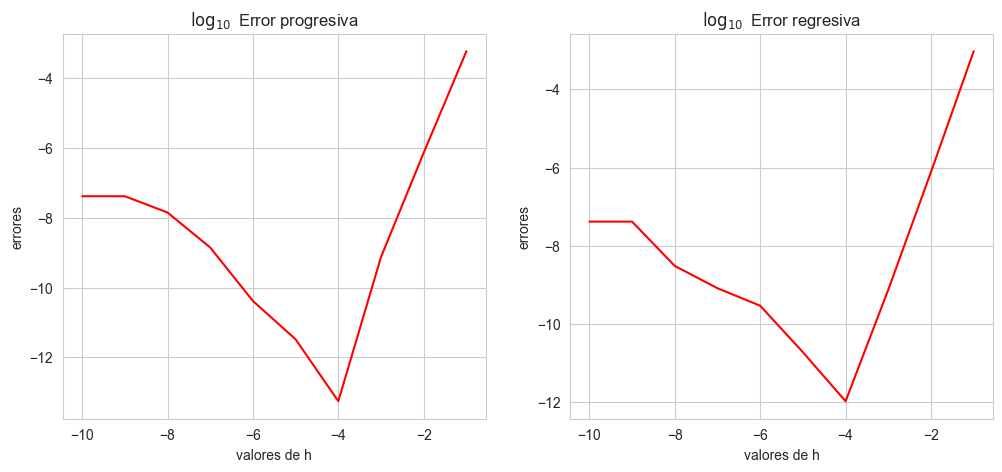

In [45]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))

ax1.plot(h_values,np.log10(error_prog),color='r')
ax1.set_xlabel("valores de h")
ax1.set_ylabel("errores")
ax1.set_title('$\log_{10}$ Error progresiva');

ax2.plot(h_values,np.log10(error_reg),color='r')
ax2.set_xlabel("valores de h")
ax2.set_ylabel("errores")
ax2.set_title('$\log_{10}$ Error regresiva');

**Observación:** Antes de solicitar ayuda a sus compañeros o ayudar a sus compañeros, tenga en cuenta lo siguiente:


*   Su puntuación máxima es 300 pts.
*   El cálculo de su nota se realizará según la siguiente lógica:
$$Nota = 3.5 + 1.5\frac{X - PC}{MX - PC}$$ 

donde:

*   $PC=$ puntuación promedio de todos los estudiantes.
*   $MX=$ máxima puntuación obtenida en la clase.
*   $X=$ su puntuación

**Nota:** Por favor incluir en el archivo que contenga la solución los script, funciones, gráficas, código y cualquier otro elemento utilizado. No coloque respuestas sin justificación, muestre todo los desarrollos.

**Recuerde:** En este curso no se tolerará el plagio. Sin excepción, en caso de presentarse esta situación, a los estudiantes involucrados se les iniciará proceso de investigación, y se actuará en conformidad con el Reglamento de Estudiantes de la Universidad del Norte. El plagio incluye: usar contenidos sin la debida referencia, de manera literal o con mínimos cambios que no alteren el espíritu del texto/código; adquirir con o sin intención, trabajos de terceros y presentarlos parcial o totalmente como propios; presentar trabajos en grupo donde alguno de los integrantes no trabajó o donde no se hubo trabajo en equipo demostrable; entre otras situaciones definidas en el manual de fraude académico de la Universidad del Norte [(pdf)](https://guayacan.uninorte.edu.co/normatividad_interna/upload/File/Guia_Prevencion_Fraude%20estudiantes(5).pdf).